### 결정 트리 모델의 시각화

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #데이터 분할 위한 함수 가져오기
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성함
# export_graphviz()에 인자로 학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭을 입력해주면 됨. 
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)  #impurity는 불순도 의미

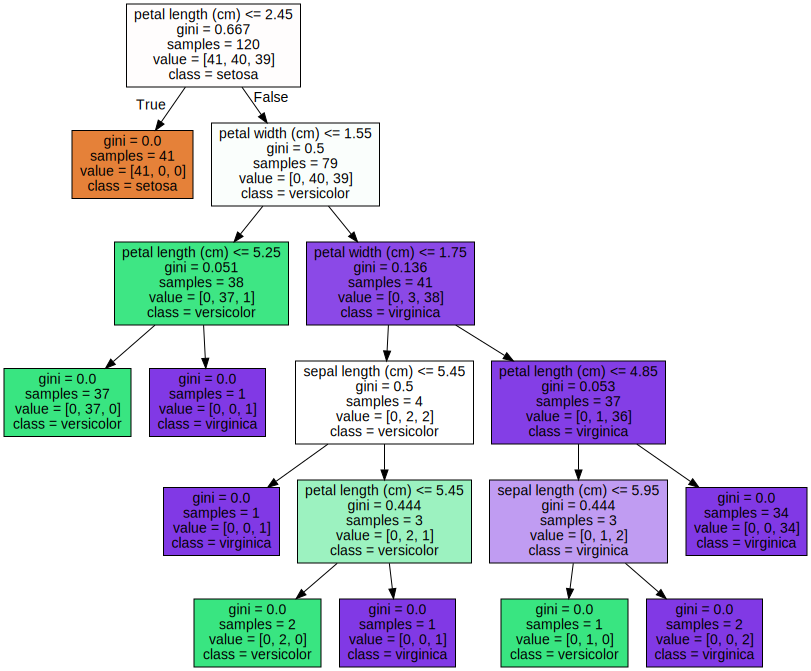

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 일어서 주피터 노트북상에서 시각화
with open("tree.dot")as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

* 리프 노드: 자식이 없는 노드로 최종 클래스(레이블) 값이 결정되는 노드임. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리츠 노드가 될 수 있ㄴ느 하이퍼 파라미터 조건을 충족하면 됨.
* 브랜치 노드: 자식 노드가 있는 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음
* 1번 노드
  * petal length(cm)<=2.45 는 피처의 조건으로 자식도느를 만들기 위한 규칙임 이 규칙이 없으면 리프 노드
    * 위 규칙이 True/False면 2,3번 노드가 만들어짐
  * gini는 value=[] 지니계수
  * samples는 현 규칙에 해당하는 데이터 건수로 120개
  * value=[]는 클래스 값 기반의 데이터 건수 (여기서는 41,40,39)-각 품종별로 가진 데이터 수
  * class=setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 것을 의미
* 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미함. 주황색이 세토사, 초록색이 버지컬러, 나머지가 보라색. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음
* 2번노드는 모든 데이터가 Setosa 로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없음. petal length(cm)<=2.45가 True인 규칙으로 생성되는 리프 노드임.

### 결정 트리 파라미터

* 마지막에 리프 노드로 떨어질때 까지 계속 가치지기 하니까 복잡한 트리규칙이 만들어져 모델이 쉽게 과적합될수 있음. 하이퍼 파라미터로 이를 조절할수 있음.
  * max_depth는 결정 트리의 최대 트리 깊이를 제어함. 
  * min_samples_splits는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수임. 이 최소 샘플개수를 4개로 설정했는데 실제 샘플개수가 3개밖에 없으면 더 이상 분할이 진행되지 않아 그냥 리프노드가 됨.
  * min_samples_leaf는 더이상 자식 노드가 없는 리프 노드는 클래스 결정값이 되는데, 이때 저 파라미터가 리프 노드가  될 수 있는 샘플 데이터 건수의 최솟값을 지정함. 이 값을 키우면 더 이상 분할 하지 않고 더 쉽게 리프노드가 될수 있음. 
    * min_samples_leaf = 4이면 샘플이 4이하이면 리프노드가 됨.
  
`그러면 더 안좋자나. 디폴트값으로 1일때보다 4일때가 더 복잡한 트리가 되는게 아닌가..?`

* 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DescisionTreeClassifier 객체의 feature_importances_속성으로 제공함.
* feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 중요도 값이 할당됨. 값이 높을수록 피처의 중요도가 높다는 뜻.

### 결정 트리 알고리즘에서 중요도 추출

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

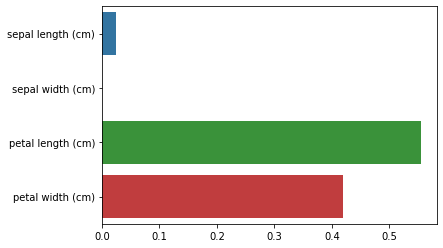

In [7]:
# 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘의 중요도 추출하기
# fit()으로 학습된 DecisionTreeClassifier 객체 변수인 dt_clf에서 
# feature_importances_ 속성을 가져와 피처의 중요도를 매기고 이를 막대그래프로 표현해보자

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

`근데 중요도 알아서 뭐함?`

### 결정 트리 과적합

* 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification()함수를 제공함
* make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트임.

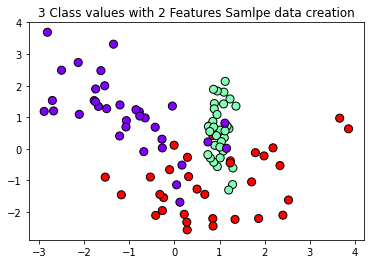

In [10]:
# make_classification()함수를 이용해 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고,
# 이를 그래프 형태로 시각화 해보자.

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Samlpe data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=65, cmap='rainbow', edgecolor='k')

각 피처(길이나 너비 이런거)가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스(세토사나 이런거)값 구분됨.

In [13]:
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드

#반환값 X : [n_samples, n_features] 크기의 배열-> 독립변수로 피처
#      y : [n_samples] 크기의 배열-> 종속변수로 클래스 레이블

#### X_features와 y_lables 데이터 세트를 기반으로 결정트리 생성하기

* visualize_boundary()는 머신러닝 모델이/ 클래스 값을 예측하는 결정 기준을/ 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측하고 분류하는지 잘 이해할수 있게 해줌.

In [20]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

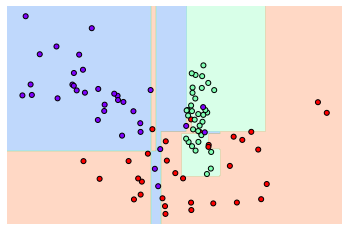

In [25]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많음.
* 결정트리의 기본 하이퍼 파라미터 설정은 리프노드 안에 데이탁 모두 균일하거나 하나만 존재해야 하는 럼결한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해짐.

`??이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측정확도가 떨어진다 에서 그 약간만 다른 형태의 데이터 세트라는게 몰까..??`

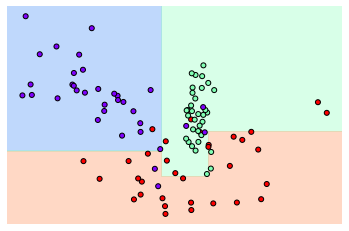

In [26]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
# 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화함.

dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알수 있음.
* 예측성능은 전자보다 이게 더 뛰어남, 학습 데이터에만 지나치게 최적화된 분류기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df=pd.read_csv('./human_activity/features.txt', sep='\s+',
                            header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:, 1].values.tolist() # iloc()로 첫번째 열인 칼럼 이름만 추출하고 
                                                          # values.tolist()로 리스트 타입으로 변환
print('전체 피처명에서 10개만 추출:', feature_name[:10])

# 피처명을 보면 인체의 움직임과 관련된 속성의 평균 및 표준편차가 X, Y, Z 축 값으로 돼 있음을 유추가능
# 중복된 피처명 갖는 것을 방지해야함.

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [69]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


+) 확장자가 csv가 아닌 파일 즉, 데이터를 구분하는 구분자가 쉼표(Comma)가 아니면 sep인수를 써서 구분자를 지정해준다. 예를들면 구분자의 길이가 정해지지 않은 공백인 경우 \s+ 정규식 문자열을 사용할 수 있다.

In [40]:
# 중복된 피처명이 얼마나 있는지 알아보자
feature_dup_df=feature_name_df.groupby('column_name').count() # column_name별로 그룹화 하고 개수 세어줌
print(feature_dup_df[feature_dup_df['column_index'] > 1].count()) 
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [42]:
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [50]:
feature_dup_df[feature_dup_df['column_index'] > 1]

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


* 총 42개의 피처명이 중복돼 있어서 이 중복된 피처명은 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_human_dataset()를 생성할 것임

In [64]:
def get_new_feature_name_df(old_feature_name_df): #임의의 함수 설정. 오래된 피처이름 갱신용 함수 만들어줌
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
                # old_feature_name_df를 칼럽 이름으로 그룹화 하고, 'dup_cnt'라는 칼럼에서 중복변수 몇번나온지 세어줌.
    feature_dup_df=feature_dup_df.reset_index() #인덱스를 0~로 기본으로 설정
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
                        # 이러면 how로 둘을 합쳐서 reset_index로 순서를 통일시키고, 값과 중복변수의 횟수가 같이 나옴.
    new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                if x[1]>0 else x[0], axis=1)
                          #1번 이상이면 해당 값에 '_중복횟수'가 나오게 하고 아니면 행의값으로 원래 값 나옴.
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
                         #근데 여기서 왜 인데스 버림??
    return new_feature_name_df

* cumcount()는 중복 변수마다 몇번째인지 값을 넣어줌. 

`저기 위에서 drop 인덱스 왜하는 거지??`

In [66]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [67]:
df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [70]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df=pd.read_csv('./human_activity/features.txt', sep='\s+',
                    header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트를 객체로 다시 변환(인덱스 빼고 리스트 타입화 함)
    feature_name=new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터을 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train=pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name )
    X_test=pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train=pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test=pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test=get_human_dataset()

`칼럼명 부여하는데 names=feature_name, names=['action']에서 왜 하나만 대괄호 썼을까..?`

In [63]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

# 피처가 전부 float 형의 숫자형 이기에 별도의 카테고리 인토딩을 수행할 필요 없.

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


`학습 데이터 세트는 7532개의 레코드로 561개의 피처를 가진다는데 머선말이야,,레코드랑 피처 개수 왜 다름?`

In [71]:
print(y_train['action'].value_counts()) 

# 레이블 값은 1~6이며 보다시피 특정값으로 왜곡되지 않고 고름.

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


* 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행해보자

In [75]:
# 먼저 DecisionTreeClassifier의 하이퍼 파라미터는 모두 디폴트 값으로 설정해 수행하고, 
# 이때의 하이퍼 파라미터 값을 모두 추출해보자
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


* 이번엔 결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴보자

In [78]:
# GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절 할수 있는 하이퍼 파라미터인
# max_depth 값을 변화시키면서 예측 성능을 확인해보자 
# 교차 검증 세트는 5개. 

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1) 
                       # cv 교차검증 분리 수 설정
                       # verbose=1는 진행상황을 보여줌, 근데 너무 많아 적당히 조절 요함.
                       # epochs(에포크)는 학습의 전체 반복 주기를 말함.
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

# 출력하면 알겠지만 max_depth가 16일 때 폴드 세트의 최고 평균 정확도 결과가 가장 높다

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


* 5개의 cv세트에서 max_depth 값에 따라 예측 성능이 어떻게 변했는지 GridSearchCV 객체의 cv_results_속성을 통해 알아보자
   *  cv_results_는 CV세트에서 하이퍼 파라미터를 순차적으로 입력시, 성능 수치를 가지고 있음.

In [79]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 및 학습 데이터 세트의 정확도 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

# 출력하면 알겠지만 깊이가 8일때가 정확도가 가장 높고, 이후 점점 떨어짐
# ->깊이진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져와도 검증 데이터 세트에서는 오히려 과적합으로 성능 저하유발.
# ->복잡한 모델보다 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있음.

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


* max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해보자

In [81]:
params = {
    'max_depth' : [8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [82]:
# best_df_clf는 최적의 파라미터인 'max_depth': 8, 'min_samples_split': 16으로 학습이 완료된 Estimator 객체임.
# 이를 통해 테스트 및 학습 데이터 세트 예측 해보자
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


* 결정 트리에서 각 피처의 중요도를 feature_importances_속성을 이용해 알아보자. 

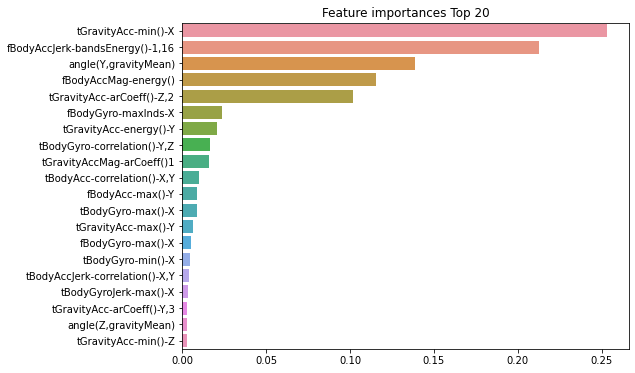

In [86]:
# 아래는 중요도 top20 나타내 막대그래프
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# 참고로 pandas에는 Series와 DataFrame이라는 두 종류의 자료구조가 있음. 

### 앙상블 학습

* 앙상블 학습 통한 분류는 여러개의 분류기를 생성하고 그 예측을 결합 함으로써 보다 정확한 최종 예측을 도출하는 기법을 말함. 
* 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것임. 
* 대부분 정형 데이터 분류시에는 뛰어난 성능을 보임.
* 앙상블 학습의 유형은 보팅, 배깅, 부스팅의 세가지로 나누며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있음.
  * 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식임.
    * 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘이 기반(교차검증이 중첩을 허용하지 않은 것과 달리 배깅중첩 허용)
    * 보팅의 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합해 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행. 대표적인 배깅 방식이 바로 랜덤 포레스트.
   * 부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것임.
   * 스태깅은 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법임.

+) 개별 분류기에게 데이터 샘플링헤서 추출하는 방식을 부트스트래핑 분할 방식, 개별 분류기가 부트 스트래핑 방시으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과로 선정 하는 방식이 배깅 앙상블 방식.

#### 보팅유형
* 하드 보팅: 다수결과 비슷. 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정.
* 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레입ㄹ ㅡ값을 최종 보팅값으로 선정 (일반적인 보팅 방법이고 전자 보다 성능이 좋음)

#### 보팅 분류기

* 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어보자

In [87]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기 생성 가능
* VotingClassifier 클래스는 주요 생성 인자로 estimator과 voting값을 입력받음.
* estimator는 리스트 값으로 보팅에 ㅅ사용될 여러개의 Classifier 객체들을 튜플형식으로 입력받으며 voting은 소프튼지 하든지 결정

In [89]:
# 개별 모델은 로지스틱 회귀와 KNN 임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


+) 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 함.

### 랜덤 포레스트

* 배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘임. 배깅의 대표적인 알고리즘이 랜덤 포레스트. 앙상블 학습중 빠른속도와 다양한 영역에서 높은 정확도를 가짐
* 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정함. 
* 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘의 결정 트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑 분할 방식이라하고 랜덤 포레스트의 서브세트가 만들어 질때 이런 방식이 활용돼 중첩이 된다.

* 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy))

랜덤 포레스트 정확도: 0.9253


* 랜덤 포레스트 하이퍼 파라미터 및 튜닝
  * n_estimator: 랜덤 포레스트에서 결정 트리의 개수를 지

In [94]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝
#튜닝 시간 절약하기 위해 n_estimator=100, CV=2로 설정해 최적의 하이퍼 파라미터 구해보기

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [6, 8, 10, 12], 
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1) # n_jobs 매개 변수를 사용하여 사용할 코어 수를 지정
                                                           # n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.
grid_cv = GridSearchCV(rf_clf , param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [95]:
# n_estimator=300으로 증가시키고, 최적화 하이퍼 파라미터로 RandomForestClassifier를 학습시킨 뒤 테스트 데이터 세트에서 예측성능 보기
 
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train) 
pred = rf_clf1.predict(X_test) 
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


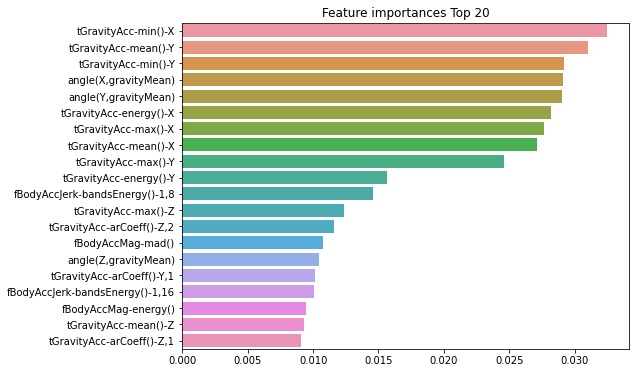

In [96]:
# RandomForestClassifier에서 해당 피처의 중요도를 막대그래프로 시각화 해보자
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### GBM

* 부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습-예측 하면서/ 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가는 학습 방식임. 대표적인 예로는 에이다 부스트와 그래디언트 부스트가 있음
* 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅으 수행하는 대표적인 알고리즘
  * 개별 약한 학습기를 통해 여러 분류기준에 따라 분할하고 가중치를 더함. 그리고 이 여러 분류기준을 결합한 약한 학습기로 결과를 예측하면 개별 약한 학습기보다 정확도가 훨씬 높아짐
* GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이점임
* 오류값은 실제값 - 예측값임. 
* 분류의 실제 결괏값을 y, 피처를 x1,x2..xn, 그리고 이 피처에 기반한 예측 함수 F(x)함수라고 하면 오류식 h(x)=y-F(x)가 됨. 이 오류식 h(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법이다. 걍 '반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법' 정도로 이해하자.

* 사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공함.

In [97]:
# 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류해보자.
# 또한 소요 시간이 얼마나 걸리는지 측정해보자

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 729.1 초 


* 수행 시간 문제는 GBM이 극복해야 할 중요한 과제임. 사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아서 대용량 데이터의 경우 학습에 많은 시간이 필요함. 반면 랜덤포레스트의 경우 상대적으로 빠른 수행 시간을 보장해 주기에 더 쉽게 예측 결과를 도출할 수 있음.

#### GBM 하이퍼 파라미터 및 튜닝